# Лабораторная работа №1. Гармоники
## Жилкина Лада, 5130901/10202

## Упраженение 2.2

In [56]:
import numpy as np
import sys
sys.path.append('../')
from thinkdsp import read_wave
from thinkdsp import SquareSignal, TriangleSignal, Sinusoid, decorate, normalize, unbias, PI2

Для начала посмотрим на треугольный сигнал и его спектр...

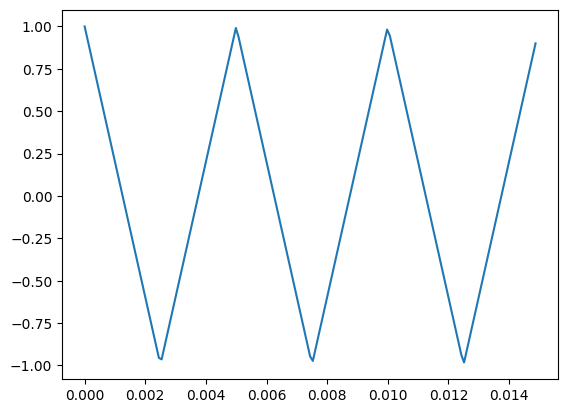

In [57]:
tri_signal = TriangleSignal(200)
tri_signal.plot()

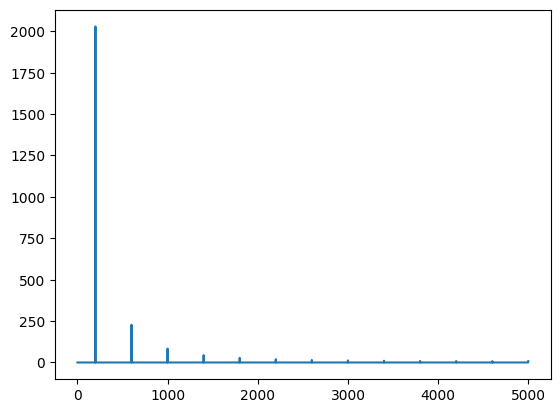

In [58]:
tri_wave = tri_signal.make_wave(duration=.5, framerate=10000)
tri_spectrum = tri_wave.make_spectrum()
tri_spectrum.plot()

... а также на прямоугольный сигнал и его спектр.

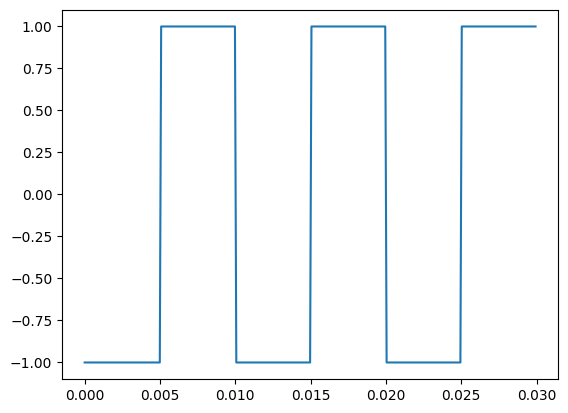

In [59]:
sq_signal = SquareSignal(100)
sq_signal.plot()

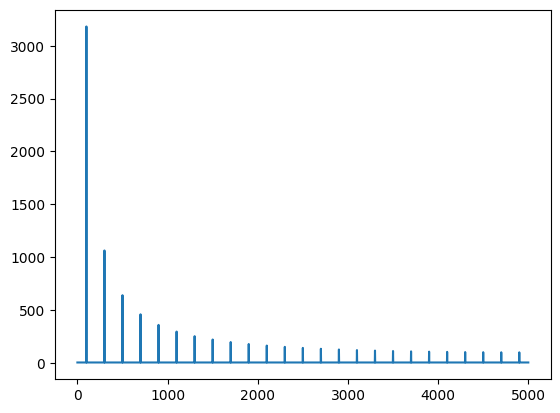

In [60]:
sq_wave = sq_signal.make_wave(duration=.5, framerate=10000)
sq_spectrum = sq_wave.make_spectrum()
sq_spectrum.plot()

Напишем класс SawtoothSignal, расширяющий signal и предоставляющий evaluate для оценки пилообразного сигнала. В методе evaluate пропишем: * cycles - число циклов со времени начала. np.modf разделяет число циклов на дробную часть frac и целую часть, которая не используется. * frac - последовательность, растущая от 0 до 1 с заданной частотой. * unbias - смещает сигнал так, что он центрируется к 0. normalize масштабирует его до заданной амплитуды amp. 

In [61]:
class SawtoothSignal(Sinusoid):
    """Represents a sawtooth signal."""

    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times

        returns: float wave array
        """
        ts = np.asarray(ts)
        cycles = self.freq * ts + self.offset / PI2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

Протестируем класс, построив график сигнала и его спектра.

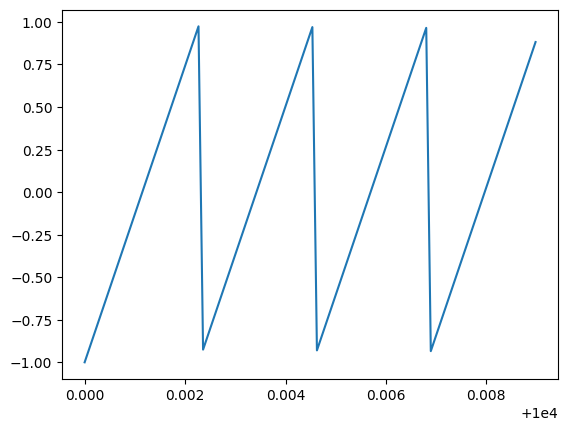

In [62]:
signal = SawtoothSignal() 
duration = signal.period*4
segment = signal.make_wave(duration, 10000) 
segment.plot()

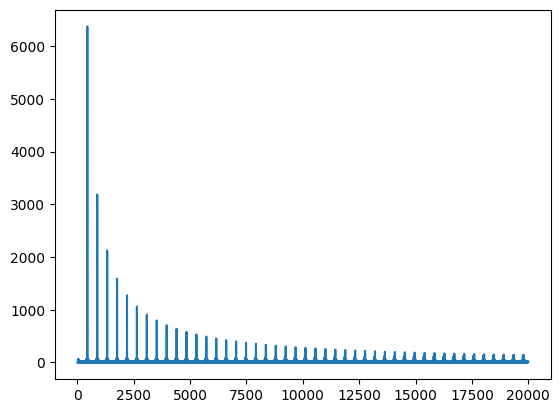

In [63]:
spec = SawtoothSignal().make_wave(duration=0.5,framerate=40000).make_spectrum() 
spec.plot()

- сравнивая гармоническую структуру пилообразного сигнала с прямоугольным сигналом можно отметить, что пилообразный сигнал, как и прямоугольный, падает пропорционально 1/f (где f - частота), но в отличие от прямоугольного включает в себя как четные, так и нечетные гармоники
- сравнивая гармоническую структуру пилообразного сигнала с треугольным сигналом можно отметить, что треугольный сигнал падает пропорционально 1/f^2, а пилообразный - 1/f

## Упражнение 2.3
Создадим прямоугольный сигнал 1100 Гц и вычислим wave с частотой 10000 кадров в секунду.ё

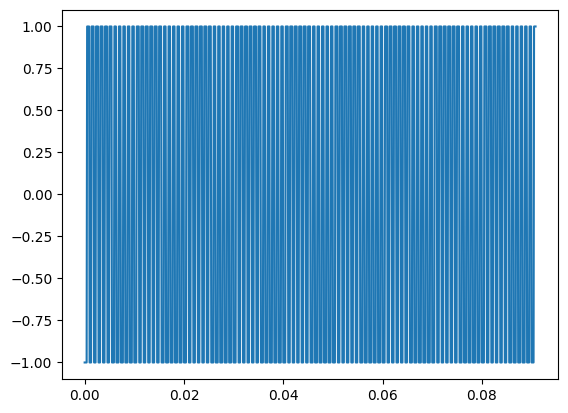

In [64]:
from thinkdsp import SquareSignal
signal = SquareSignal(1100)
duration = signal.period * 100
segment = signal.make_wave(duration, framerate = 10000)
segment.plot()

In [65]:
wave = signal.make_wave(duration = 2, framerate = 10000)
wave.apodize()
wave.make_audio()

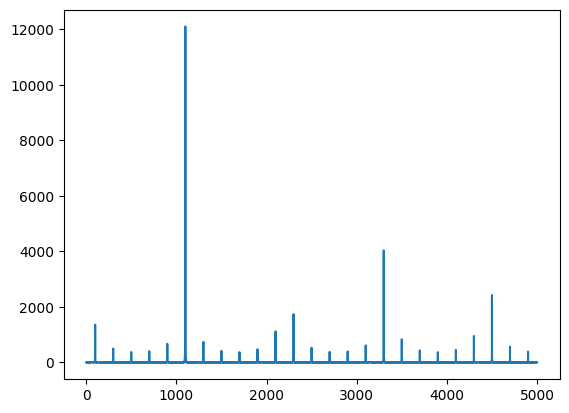

In [66]:
spectrum = wave.make_spectrum()
spectrum.plot()

Во время прослушивания слышится биение из-за того, что большинство гармоник были завернуты.

## Упражнение 2.4
Возьмём объект Spectrum и распечатаем несколько первых занчений spectrum.fs.

In [67]:
spectrum.fs[:5]

array([0. , 0.5, 1. , 1.5, 2. ])

spectrum.fs[0] = 0 - амплитуда компоненты с частотой 0. Чтобы понять, что это значит, проведём следующий эксперимент:
1. Создадим треугольный сигнал с частотой 440 Гц и длительностью 0,01 сек.

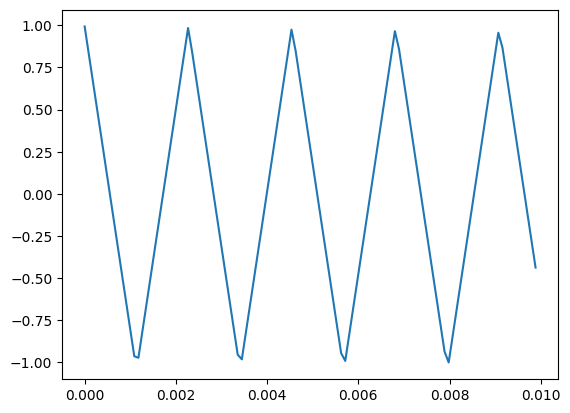

In [68]:
triangle = TriangleSignal(440).make_wave(duration = 0.01)
triangle.plot()

2. Создадим объект Spectrum и распечатаем Spectrum.hs[0]

In [69]:
spectrum = triangle.make_spectrum() 
spectrum.hs[0]

(1.0436096431476471e-14+0j)

Каждый элемент массива hs объекта Spectrum представляет собой комплексное число и соответствует частотной компоненте: размах пропорционален амплитуде соответствующей компоненты, а угол - это фаза. Первый элемент массива hs - комплексное число, близкое к нулю, мнимая часть равна нулю. \
\
3. Установим Spectrum.hs[0] = 100.

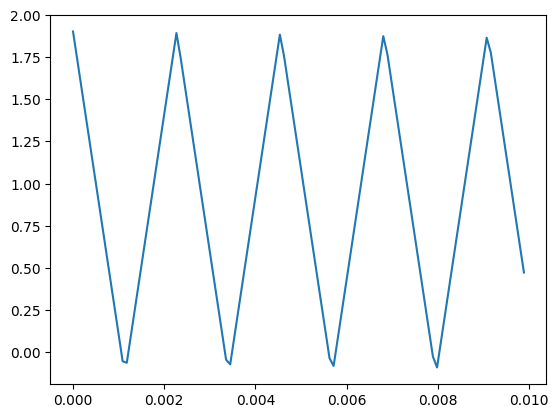

In [70]:
spectrum.hs[0] = 100
spectrum.make_wave().plot()

Высота графика увеличилась.
## Упражнение 2.5
Напишем функцию, принимающую Spectrum как параметр и изменяющую его делением каждого элемента hs на соответствующую частоту из fs. 

In [71]:
def filter_spectrum(spectrum):
  """ Divides amplitudes by corresponding frequences

  spectrum: Spectrum
  returns: None
  """ 
  spectrum.hs[0] = 0
  spectrum.hs[1:] /= spectrum.fs[1:]

Протестируем функцию на прямоугольном сигнале.

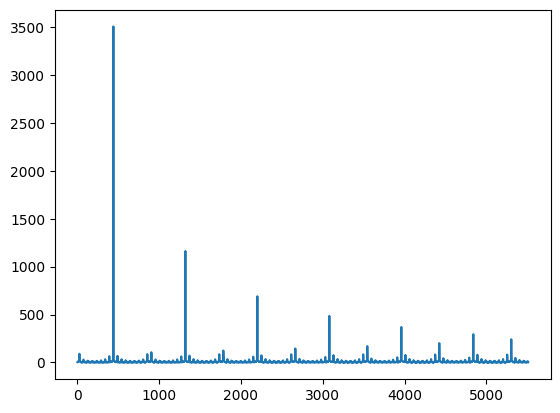

In [72]:
sig = SquareSignal(freq=440).make_wave(duration=0.5)
spec = sig.make_spectrum()
spec.plot() 
sig.make_audio()

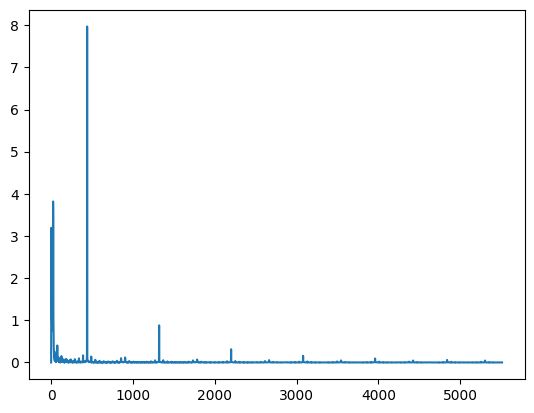

In [73]:
filter_spectrum(spec)
spec.plot()
spec.make_wave().make_audio()

Функция действует как фильтр низких частот. Второй звук звучит более чисто и приглушённо.
## Упражнение 2.6
Найдём сигнал, состоящий из чётных и нечётных гармоник, спадающих пропорционально 1/f^2. Для этого создадим пилообразный сигнал и применим к нему функцию, написанную в прошлом упражении.

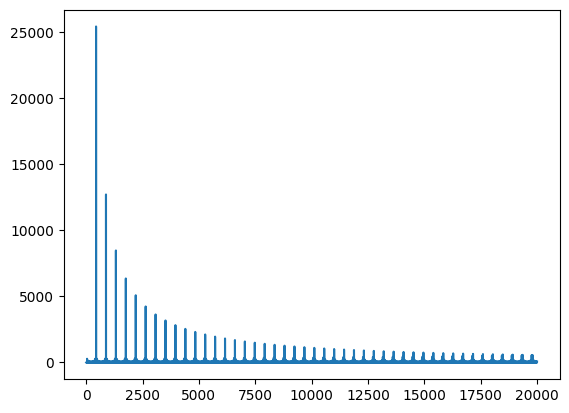

In [74]:
saw = SawtoothSignal(440)
saw_wave = saw.make_wave(duration=2, framerate=40000)
saw_spec =  saw_wave.make_spectrum()
saw_spec.plot()

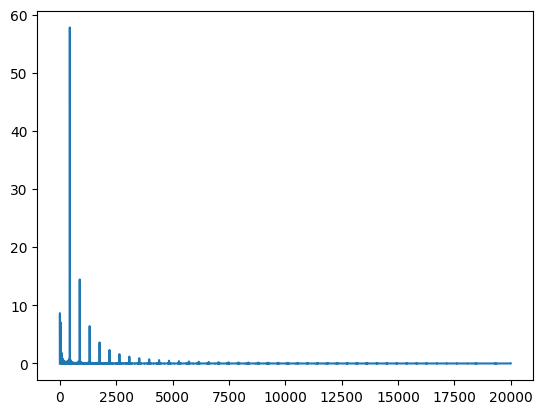

In [75]:
filter_spectrum(saw_spec)
saw_spec.plot()